In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
def IsNone(x):
    return type(x) == type(None)

def BiasAdd(data):
    return np.append(np.ones((data.shape[0], 1)), data, axis=1)

def QuadraticLize(data):
    output = np.zeros((len(data), 0), dtype=np.float64)
    for d in range(data.shape[1]):
        output = np.append(output, data[:, d:]*data[:, d:d+1], axis=1)
    
    return output

class PLA():
    def __init__(self, dimension, has_bias=True, is_quadratic=False):
        self.dimension = dimension
        
        self.has_bias = has_bias
        self.is_quadratic = is_quadratic
        if self.has_bias:
            dimension += 1
        
        if self.is_quadratic:
            dimension = int(dimension*(dimension+1)/2)
        
        self.weight = np.ones((dimension))
    
    def Nomalized(self, weight_norm = None):
        self.weight /= np.linalg.norm(self.weight) + 0.000000001
        if not IsNone(weight_norm):
            try:
                self.weight *= weight_norm
            except:
                print("multiple error, skip this process (*1)")
    
    def Fit(self, data, label):
        if self.has_bias:
            data = BiasAdd(data)
        
        if self.is_quadratic:
            data = QuadraticLize(data)
        
        error = (np.dot(data, self.weight)*label < 0)
        if not error.any():
            return None
        
        self.weight += (data[error]*label[error, np.newaxis]).mean(axis=0)
    
    def Train(self, data, label, times):
        for t in range(times):
            self.Fit(data, label)
    
    def Inference(self, data):
        if self.has_bias:
            data = BiasAdd(data)
        
        if self.is_quadratic:
            data = QuadraticLize(data)
        
        return 2*(np.dot(data, self.weight) > 0) - 1
    

# Linear case

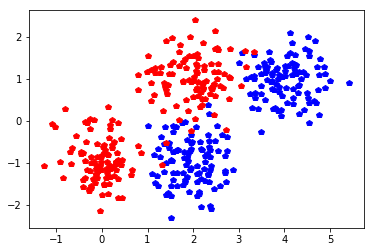

In [180]:
X = np.random.normal(0, 0.5, (400,2))
Y = np.ones((400))

X[:100] += [4, 1]
X[100:200] += [2, -1]
X[200:300] += [2, 1]
X[300:] += [0, -1]

Y[200:] = -1

plt.plot(X[:200,0], X[:200,1], "bp")
plt.plot(X[200:,0], X[200:,1], "rp")
plt.show()

lattice = np.zeros((40,40,2))
arange = (np.arange(40)/5)-2
lattice[:,:,0] = np.dot(arange[:, np.newaxis], np.ones((1, 40)))
lattice[:,:,1] = lattice[:,:,0].T
lattice = lattice.reshape(-1,2)

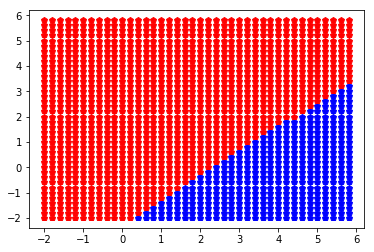

In [182]:
myPLA = PLA(2)
myPLA.Train(X,Y, 100)
myPLA.Nomalized()

infer = myPLA.Inference(lattice)
plt.plot(lattice[infer>0, 0], lattice[infer>0, 1], "bp")
plt.plot(lattice[infer<0, 0], lattice[infer<0, 1], "rp")
plt.show()

# Quadratic Case

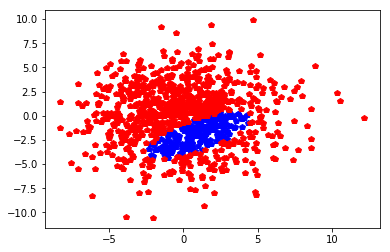

In [220]:
X = np.random.normal(0, 3, (1000,2))
Y = np.ones((1000))

out_ell = (0.5*(X[:, 0] - 1)**2 + (X[:, 1] + 2)**2 - 1*(X[:, 0] - 1)*(X[:, 1] + 2)  > 3)
in_ell = np.logical_not(out_ell)


Y[out_ell] = -1.

plt.plot(X[in_ell,0], X[in_ell,1], "bp")
plt.plot(X[out_ell,0], X[out_ell,1], "rp")
plt.show()

lattice = np.zeros((60,60,2))
arange = (np.arange(60)/5)-6
lattice[:,:,0] = np.dot(arange[:, np.newaxis], np.ones((1, 60)))
lattice[:,:,1] = lattice[:,:,0].T
lattice = lattice.reshape(-1,2)

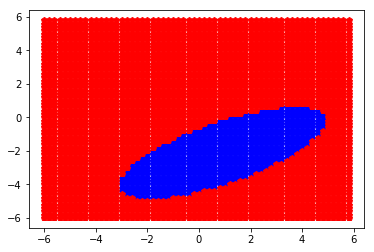

In [221]:
myPLA = PLA(2, is_quadratic=True)
myPLA.Train(X,Y, 1000)
myPLA.Nomalized()

infer = myPLA.Inference(lattice)
plt.plot(lattice[infer>0, 0], lattice[infer>0, 1], "bp")
plt.plot(lattice[infer<0, 0], lattice[infer<0, 1], "rp")
plt.show()